In [22]:
#import necesary libraries

#for data analysis
import pandas as pd
import numpy as np

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Lpip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
df=pd.read_csv(r"C:\Users\pc\Downloads\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Features in the data set and meaning
*age
*sex
*chest pain type (cp)
*resting blood pressure (trestbps)
*serum cholesterol (chol)
*fasting blood sugar(fbs)
*resting electrocardiographic results (restecg)
*maximum heart rate achieved (thalach)
*exercise-inducedangina (exang)
*ST depression induced by exercise relative to rest (oldpeak)
*the slope of the peak exercise ST segment (slope)
*number of major vessels colored by flourosopy (ca)
*thalassemia (thal).

In [25]:
#renaming of the columns for better understanding
df.columns=['age','sex','chest_pain_type','resting_blood_pressure','choslesterol','fasting_blood_sugar','rest_ecg',
            'max_heart_rate','exercise_induced_angina','st_depression','st_slope','num-major_vessels','thalassemia','target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,choslesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num-major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#data verification,data types,number of features and rows,missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   choslesterol             303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num-major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [27]:
#the statistical analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,choslesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num-major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

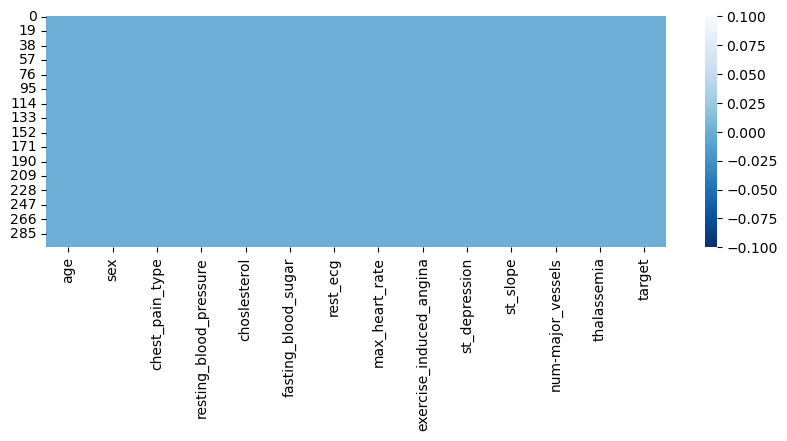

In [28]:
#check for the missing values
df.isna().sum()

#visaulizing the missing value
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(),cbar=True,cmap="Blues_r")

Exploratory data analysis

 univariate analysis

<Axes: xlabel='thalassemia'>

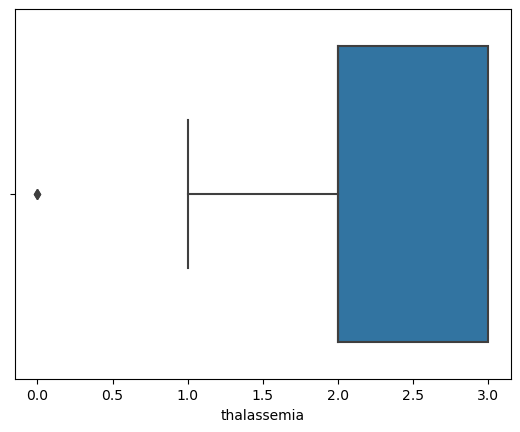

In [29]:
# checking for outliers
sns.boxplot(x=df['thalassemia'])

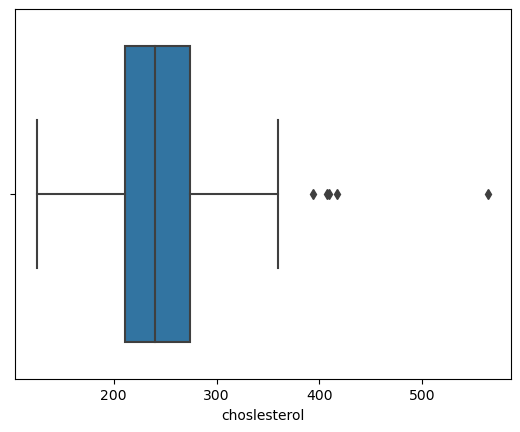

In [30]:
# checking for outliers in cholesterol
sns.boxplot(x=df['choslesterol']);

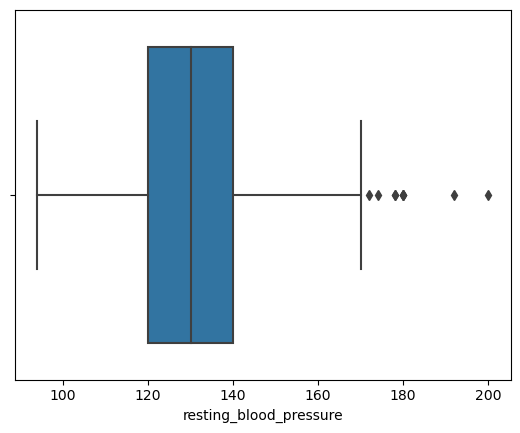

In [31]:
#checking for outliers in resting blood pressure
sns.boxplot(x=df['resting_blood_pressure']);

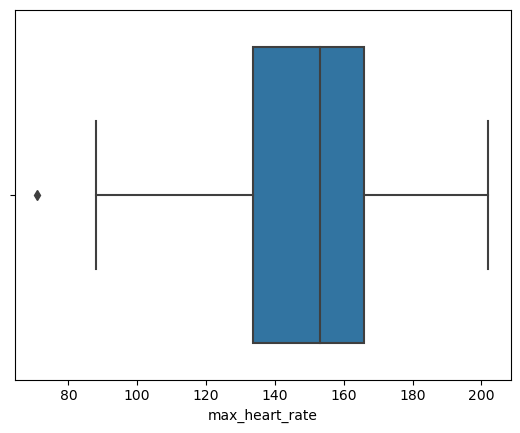

In [32]:
#checking for outliers in max_heart_rate
sns.boxplot(x=df['max_heart_rate']);

Text(0.5, 1.0, 'Total Number of Patients')

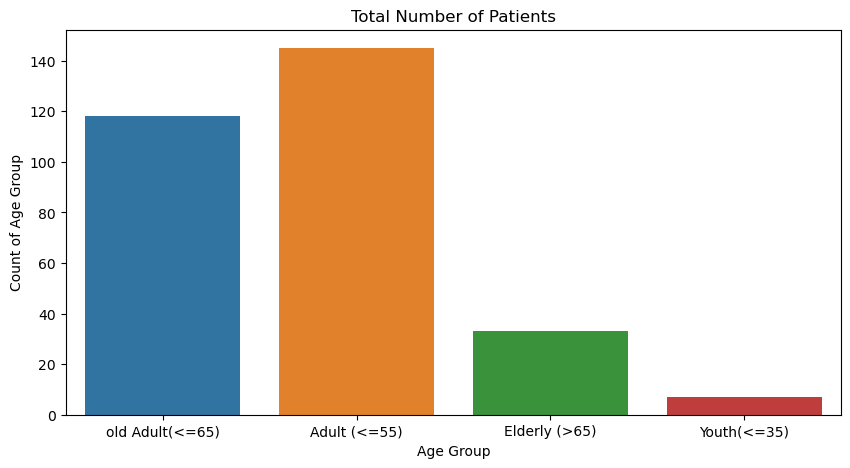

In [33]:
#data visualisation
# Age_bracket
def age_bracket(age):
    if age <=35:
        return "Youth(<=35)"
    elif age <=55:
        return "Adult (<=55)"
    elif age <=65:
        return "old Adult(<=65)"
    else:
        return "Elderly (>65)"
    
df['age_bracket'] = df['age'].apply(age_bracket)  
#investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket',data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of patients')

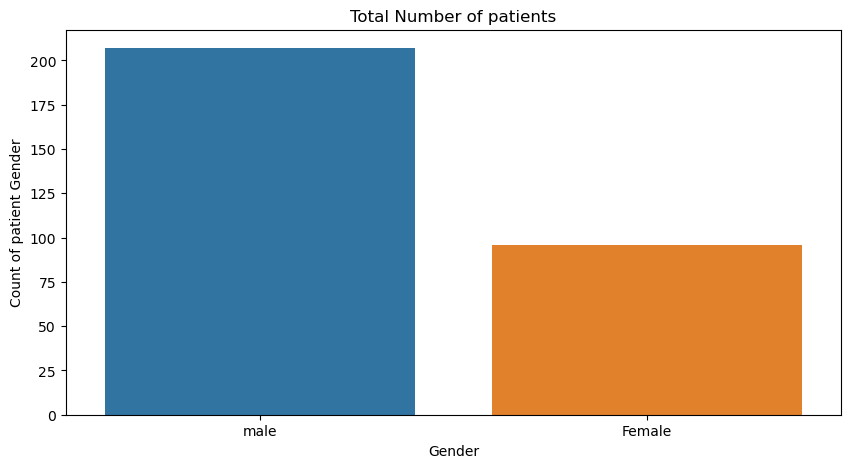

In [34]:
#Data Visualisation
#sex
def gender (sex):
    if sex ==1:
        return "male"
    else:
        return "Female"
df['gender'] = df['sex'].apply(gender)

#investigating the gender of patients
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of patients')

Text(0.5, 1.0, 'Total Number of patients')

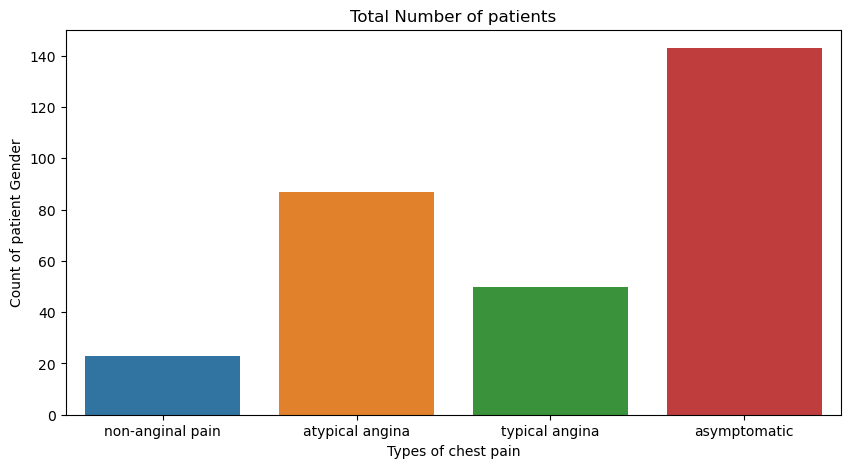

In [35]:
# Data Visaulisation
# chest pain type (1:typical angina, 2: atypical angina,3: non-anginal pain, 4: asymptomatic)
def chest_pain(cp):
    if cp ==1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"
df['cp_cat']=df['chest_pain_type'].apply(chest_pain)

#investigating the gender of patients
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat',data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of patients')

In [36]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'choslesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num-major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_cat'],
      dtype='object')

Yes    165
No     138
Name: label, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

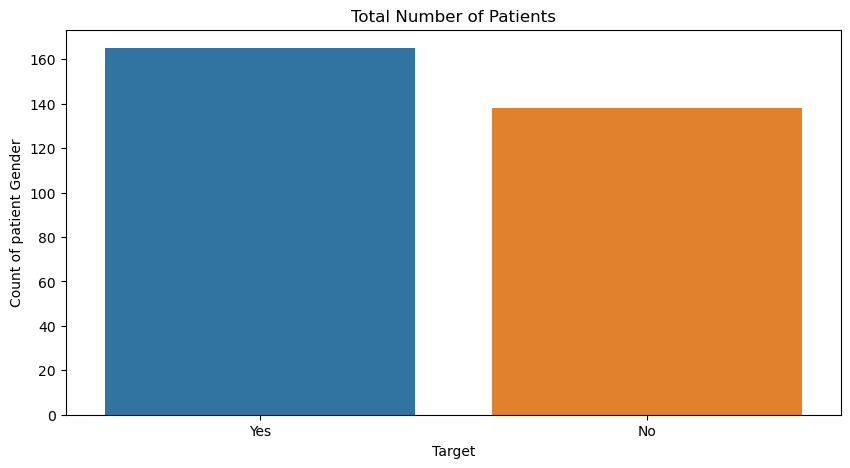

In [37]:
#data visualisation
#target- have disease or not (1=yes,0=no)
def label (tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
df['label']=df['target'].apply(label)

# Total patient in each category
print(df["label"].value_counts())

#investigating the gender of patients
plt.figure(figsize=(10,5))
sns.countplot(x='label',data=df)
plt.xlabel('Target')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

 Bivariate Analysis

Text(0.5, 1.0, 'Total Number of Patients')

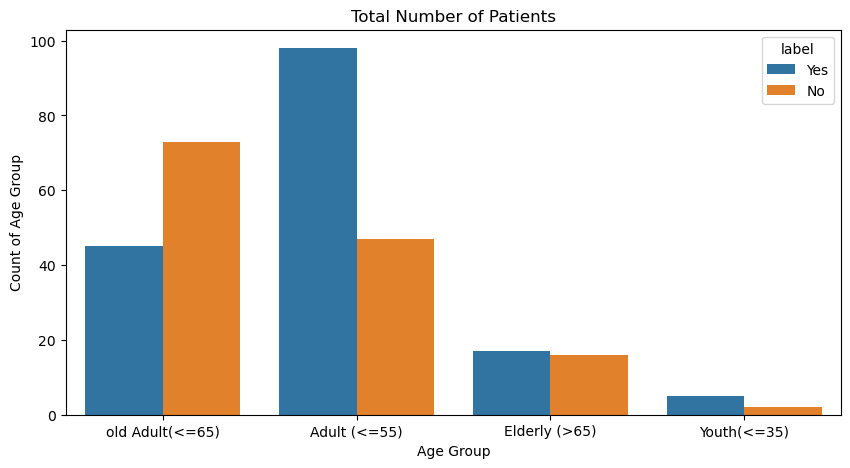

In [38]:
#investiating the age group of patients by the target features
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket',data=df,hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

It can be sumarise that the age bracket Adult (<=55) has more heart disease than other ages with Youth (<=35) being the least

Text(0.5, 1.0, 'Total Number of Patients')

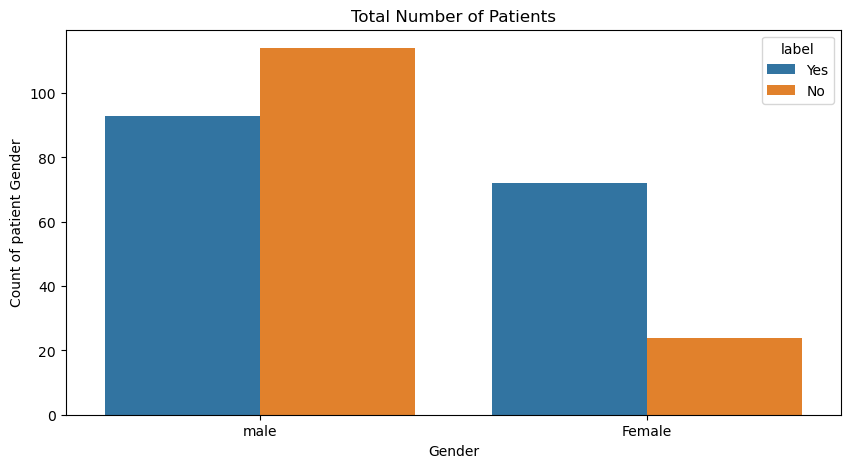

In [39]:
#investigating the gender of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=df,hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

Looking at the visuals it can be seen that less male has heart disease compared to males without heart disease,also females has more patients with heart disease compared with female with no heart disease.

Text(0.5, 1.0, 'Total Number of Patients')

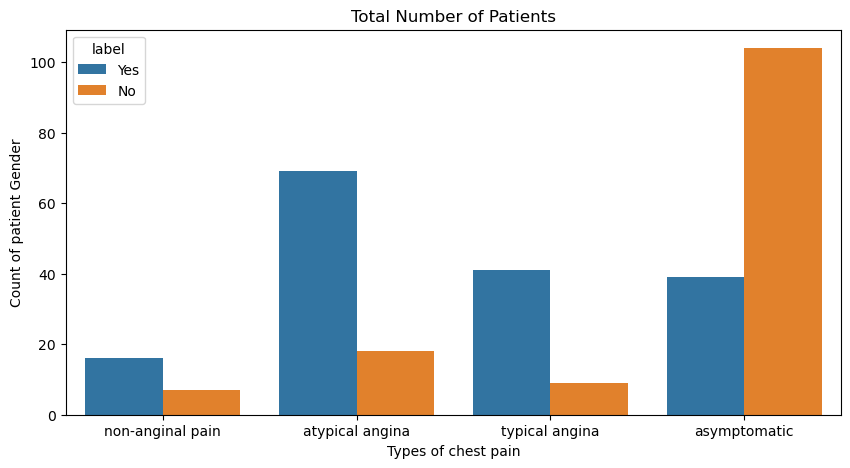

In [40]:
#investigating the gender of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat',data=df,hue='label')
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

Atypical angina has more patients with heart disease with non-angina pain having the least heart disease patients

Exploratory Data Analysis-Multivariate Analysis

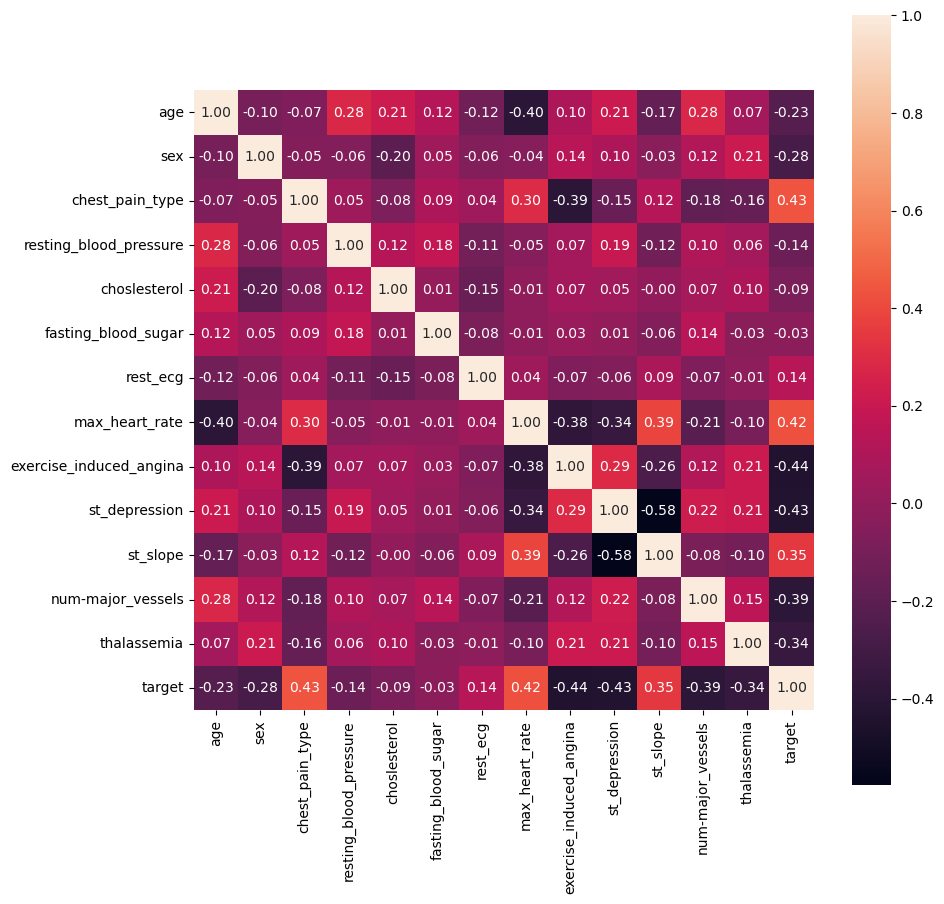

In [41]:
#correlation between saleprice and other variables in the dataset
plt.figure(figsize=(10,10))
hm=sns.heatmap(df.corr(),cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10})

In [42]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,choslesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num-major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,old Adult(<=65),male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,old Adult(<=65),male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,old Adult(<=65),Female,asymptomatic,Yes


In [43]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'choslesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num-major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_cat', 'label'],
      dtype='object')

In [44]:
#Create a copy of the data(Exclude target/labelalongside other columns that was created)
df1=df[['age','sex','chest_pain_type','resting_blood_pressure','choslesterol','fasting_blood_sugar','rest_ecg','max_heart_rate',
       'exercise_induced_angina','st_depression','st_slope','num-major_vessels','thalassemia']]

label=df[['target']]

In [45]:
label.head()
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,choslesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num-major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [46]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
choslesterol                 int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num-major_vessels            int64
thalassemia                  int64
dtype: object

In [47]:
df1.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'choslesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num-major_vessels', 'thalassemia'],
      dtype='object')

In [48]:
#Dealing with outliers-'resting_blood_pressure','cholesterol','thalassemia','max_heart_rate'
#Normalize the data
scaler = MinMaxScaler()

df1["Scaled_RBP"]=scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1["Scaled_chol"]=scaler.fit_transform(df1['choslesterol'].values.reshape(-1,1))
df1["Scaled_thal"]=scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1["Scaled_max_heart_rate "]=scaler.fit_transform(df1['max_heart_rate'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure','thalassemia','choslesterol','max_heart_rate'],axis=1,inplace=True)
df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num-major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


Machine Learning

In [49]:
# Split the dataset into training and testing Sets - X =Questions, y = Answers

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2,random_state=42)

In [50]:
#model Building
#Logistics Regression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred=logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:",accuracy_score(y_test, ly_pred))
print("Precision:",precision_score(y_test,ly_pred))
print("Recall:",recall_score(y_test,ly_pred))
print("F1-score:",f1_score(y_test,ly_pred))
print("AUC-ROC:",roc_auc_score(y_test,ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


In [51]:
X_test

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num-major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
179,57,1,0,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,0,0,1,1.9,1,2,0.377358,0.646119,1.000000,0.603053
60,71,0,2,1,0,0,0.0,2,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,0,0,0,2.0,1,3,0.433962,0.292237,1.000000,0.572519
104,50,1,2,0,1,0,0.0,2,0,0.330189,0.159817,0.666667,0.702290
300,68,1,0,1,1,0,3.4,1,2,0.471698,0.152968,1.000000,0.534351
193,60,1,0,0,0,1,2.8,1,2,0.481132,0.356164,1.000000,0.541985


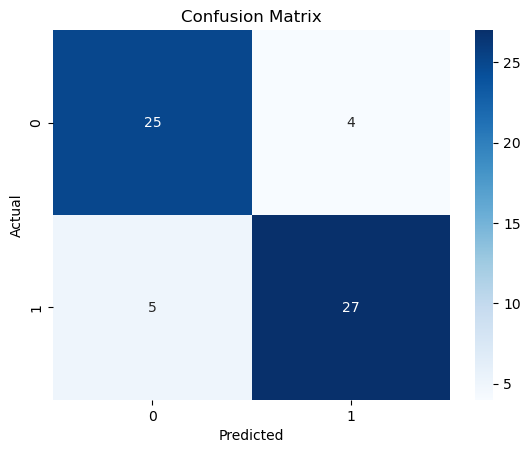

In [52]:
#create a confusion matrix
lcm = confusion_matrix(y_test,ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues",fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

going with the visauls it can be seen that for first predictions of 0 the data got 5 wrong values while the correct values are 25 with no heart disease and for the second prediction of 1 the correct value of patients with heart disease is 27 while 4 has no heart disease

In [53]:
#Model Building
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Logistic Regression")
print ("Accuracy:",accuracy_score(y_test, rfy_pred))
print("Precision:",precision_score(y_test,rfy_pred))
print("Recall:",recall_score(y_test,rfy_pred))
print("F1-score:",f1_score(y_test,rfy_pred))
print("AUC-ROC:",roc_auc_score(y_test,rfy_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1-score: 0.8615384615384615
AUC-ROC: 0.8512931034482758


the Randon forest Classifier gave more accurate prediction than the logistic regression Classifier.

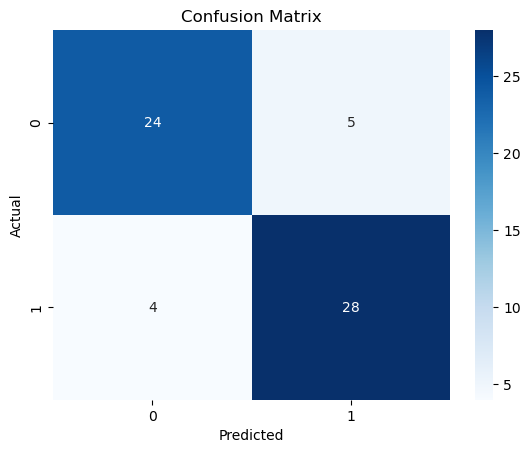

In [54]:
#create a confusion matrix
rcm = confusion_matrix(y_test,rfy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues",fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

going with the visauls it can be seen that for first predictions of 0 the data got 3 wrong values(heart disease patient) while the correct values are 24 with no heart disease and for the second prediction of 1 the correct value of patients with heart disease is 29 while 5 has no heart disease.

In [55]:
# machine learning Algorithms will be applied to the dataset
Classifiers= [[XGBClassifier(),'XGB Classifier'],
              [RandomForestClassifier(),'Random Forest'],
              [KNeighborsClassifier(),'K-Nearest Neighbours'],
              [SGDClassifier(),'SGD Classifier'],
              [SVC(),'SVC'],
              [GaussianNB(),"Naive Bayes"],
              [DecisionTreeClassifier(random_state= 42),"Decision tree"],
              [LogisticRegression(),'Logistic Regression']
              
]

In [56]:
acc_list = {}
precision_list ={}
recall_list={}
roc_list ={}


for classifier in Classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test,pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100,2)) + '%'])
    precision_list[model_name] =([str(round(p_score*100,2)) + '%'])
    recall_list[model_name] =([str(round(r_score*100,2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + '%'])
             
    if model_name != Classifiers[-1][1]:
             print('')
    

In [57]:
print ("Accuracy Score")
s1=pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,83.61%,88.52%,75.41%,49.18%,65.57%,86.89%,85.25%,85.25%


In [58]:
print ("Precision Score")
s2=pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.67%,90.32%,79.31%,100.0%,65.71%,90.0%,92.59%,87.1%


In [59]:
print ("recall_list")
s3=pd.DataFrame(recall_list)
s3.head()

recall_list


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.25%,87.5%,71.88%,3.12%,71.88%,84.38%,78.12%,84.38%


In [60]:
print ("roc_list")
s4=pd.DataFrame(roc_list)
s4.head()

roc_list


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,83.73%,88.58%,75.59%,51.56%,65.25%,87.02%,85.61%,85.29%
